In [1]:
"""
=============================================================
COMPREHENSIVE GYM BUSINESS INTELLIGENCE SYSTEM
=============================================================

Author: Carl Simpson
Date: July 2025
Business: Gym Performance Analytics & Strategic Insights

PROJECT SCOPE:
Complete analysis of gym business performance including:
- Customer segmentation (Subscriptions vs Memberships)
- Product performance ranking and optimization
- Member churn pattern analysis
- Revenue per customer type analysis
- Seasonal trend identification
- Strategic business recommendations

BUSINESS VALUE:
- Data-driven decision making framework
- Revenue optimization strategies
- Customer retention insights
- Product portfolio optimization
- Competitive advantage through analytics

TECHNICAL STACK: Python, Pandas, Matplotlib, Seaborn
=============================================================
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Professional styling
plt.style.use('default')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

print("🏋️ COMPREHENSIVE GYM BUSINESS INTELLIGENCE SYSTEM")
print("=" * 65)
print("Advanced Analytics for Strategic Business Optimization")
print("=" * 65)
print(f"Analysis Date: {datetime.now().strftime('%B %d, %Y at %I:%M %p')}")
print("Scope: Customer behavior, product performance, and revenue optimization")
print("\n🚀 Initializing comprehensive business analysis...")

🏋️ COMPREHENSIVE GYM BUSINESS INTELLIGENCE SYSTEM
Advanced Analytics for Strategic Business Optimization
Analysis Date: July 26, 2025 at 03:31 PM
Scope: Customer behavior, product performance, and revenue optimization

🚀 Initializing comprehensive business analysis...


In [2]:
# =============================================================
# SECTION 1: COMPREHENSIVE DATA LOADING & EXPLORATION
# =============================================================
print("\n📊 SECTION 1: COMPREHENSIVE DATA LOADING & EXPLORATION")
print("-" * 55)

# Load all business data
print("🔍 Loading comprehensive gym business data...")
business_columns = ['Date', 'Item', 'Quantity Sold', 'Amount Inc Tax', 'Category', 'Type']

csv_files = glob.glob("*.csv")
all_data = []

print(f"📁 Processing {len(csv_files)} months of business data:")
for file in csv_files:
    df = pd.read_csv(file)
    df_clean = df[business_columns].copy()
    df_clean['Source_Month'] = file.replace('.csv', '').replace('MFP ', '')
    all_data.append(df_clean)
    print(f"   ✅ {file}: {len(df_clean)} transactions")

# Create master dataset
gym_data = pd.concat(all_data, ignore_index=True)
gym_data['Date'] = pd.to_datetime(gym_data['Date'], dayfirst=True)
gym_data['Month'] = gym_data['Date'].dt.month_name()
gym_data['Weekday'] = gym_data['Date'].dt.day_name()
gym_data['Quarter'] = 'Q' + ((gym_data['Date'].dt.month - 1) // 3 + 1).astype(str)

print(f"\n🎯 MASTER DATASET CREATED:")
print(f"   • Total Transactions: {len(gym_data):,}")
print(f"   • Total Revenue: £{gym_data['Amount Inc Tax'].sum():,.2f}")
print(f"   • Date Range: {gym_data['Date'].min().strftime('%B %Y')} to {gym_data['Date'].max().strftime('%B %Y')}")
print(f"   • Average Transaction: £{gym_data['Amount Inc Tax'].mean():.2f}")

# Deep dive into your unique business structure
print(f"\n🔍 BUSINESS STRUCTURE ANALYSIS:")
print(f"📋 Categories in your gym:")
for i, (category, count) in enumerate(gym_data['Category'].value_counts().items(), 1):
    revenue = gym_data[gym_data['Category'] == category]['Amount Inc Tax'].sum()
    print(f"   {i}. {category}: {count:,} transactions (£{revenue:,.2f})")

print(f"\n📋 Service Types offered:")
for i, (service_type, count) in enumerate(gym_data['Type'].value_counts().head(10).items(), 1):
    revenue = gym_data[gym_data['Type'] == service_type]['Amount Inc Tax'].sum()
    avg_price = revenue / count
    print(f"   {i}. {service_type}: {count} sales (£{revenue:,.2f}, avg £{avg_price:.2f})")

print(f"\n📋 Top Revenue-Generating Items:")
top_items = gym_data.groupby('Item')['Amount Inc Tax'].agg(['sum', 'count']).round(2)
top_items.columns = ['Revenue', 'Sales_Count']
top_items = top_items.sort_values('Revenue', ascending=False).head(10)

for i, (item, data) in enumerate(top_items.iterrows(), 1):
    avg_price = data['Revenue'] / data['Sales_Count']
    print(f"   {i}. {item}: £{data['Revenue']:,.2f} ({data['Sales_Count']} sales, avg £{avg_price:.2f})")

print(f"\n✅ Comprehensive data exploration complete")
print(f"🎯 Ready for advanced business intelligence analysis")


📊 SECTION 1: COMPREHENSIVE DATA LOADING & EXPLORATION
-------------------------------------------------------
🔍 Loading comprehensive gym business data...
📁 Processing 6 months of business data:
   ✅ MFP Feb 25.csv: 191 transactions
   ✅ MFP Jun 25.csv: 248 transactions
   ✅ MFP Jan 25.csv: 272 transactions
   ✅ MFP Apr 25.csv: 210 transactions
   ✅ MFP MArch 25.csv: 207 transactions
   ✅ MFP May 25.csv: 244 transactions

🎯 MASTER DATASET CREATED:
   • Total Transactions: 1,372
   • Total Revenue: £31,135.91
   • Date Range: January 2025 to June 2025
   • Average Transaction: £22.69

🔍 BUSINESS STRUCTURE ANALYSIS:
📋 Categories in your gym:
   1. CREDIT_PACK: 1,081 transactions (£17,883.43)
   2. MEMBERSHIP: 291 transactions (£13,252.48)

📋 Service Types offered:
   1. PURCHASE: 1365 sales (£31,797.51, avg £23.29)
   2. REFUND: 7 sales (£-661.60, avg £-94.51)

📋 Top Revenue-Generating Items:
   1. 10 Sessions Per Month.: £5,710.00 (61.0 sales, avg £93.61)
   2. Smart Saver: £3,872.88 (


💰 SECTION 2: CUSTOMER BEHAVIOR & REVENUE ANALYSIS
-------------------------------------------------------
🔍 CREDIT PACK vs MEMBERSHIP ANALYSIS:

📊 CREDIT_PACK:
   • Revenue: £17,883.43 (57.4% of total)
   • Transactions: 1,081.0 (78.8% of total)
   • Average per transaction: £16.54
   • Revenue per transaction ratio: 0.7x gym average

📊 MEMBERSHIP:
   • Revenue: £13,252.48 (42.6% of total)
   • Transactions: 291.0 (21.2% of total)
   • Average per transaction: £45.54
   • Revenue per transaction ratio: 2.0x gym average

📈 MONTHLY PERFORMANCE BY BUSINESS MODEL:


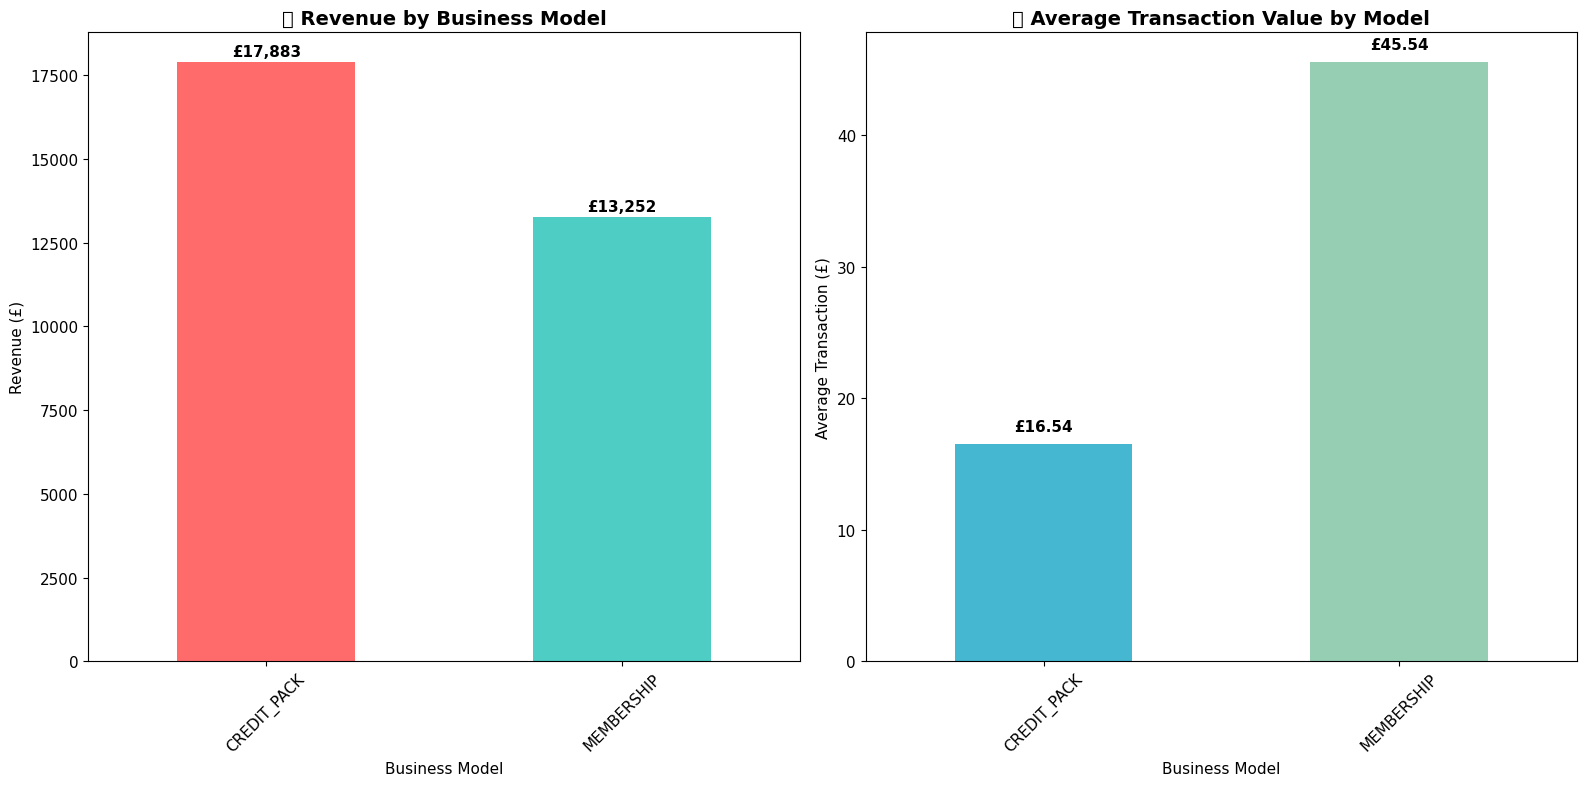


🎯 KEY BUSINESS INSIGHTS:
   • Membership customers spend £29.00 more per transaction
   • Membership premium: 175.3% higher value than credit packs
   • Revenue concentration: 42.6% from 21.2% of transactions

🚀 STRATEGIC OPPORTUNITY:
   • Converting credit pack users to memberships could generate £31,349.00 additional revenue
   • Focus marketing on membership conversion - higher customer lifetime value


In [3]:
# =============================================================
# SECTION 2: CUSTOMER BEHAVIOR & REVENUE ANALYSIS
# =============================================================
print("\n💰 SECTION 2: CUSTOMER BEHAVIOR & REVENUE ANALYSIS")
print("-" * 55)

# Deep analysis of your two business models
print("🔍 CREDIT PACK vs MEMBERSHIP ANALYSIS:")
business_model_analysis = gym_data.groupby('Category').agg({
    'Amount Inc Tax': ['sum', 'count', 'mean', 'std'],
    'Quantity Sold': 'sum'
}).round(2)

business_model_analysis.columns = ['Total_Revenue', 'Transaction_Count', 'Avg_Transaction', 'Revenue_Std', 'Total_Quantity']

for category, data in business_model_analysis.iterrows():
    percentage_revenue = (data['Total_Revenue'] / gym_data['Amount Inc Tax'].sum()) * 100
    percentage_transactions = (data['Transaction_Count'] / len(gym_data)) * 100
    print(f"\n📊 {category}:")
    print(f"   • Revenue: £{data['Total_Revenue']:,.2f} ({percentage_revenue:.1f}% of total)")
    print(f"   • Transactions: {data['Transaction_Count']:,} ({percentage_transactions:.1f}% of total)")
    print(f"   • Average per transaction: £{data['Avg_Transaction']:.2f}")
    print(f"   • Revenue per transaction ratio: {data['Avg_Transaction']/gym_data['Amount Inc Tax'].mean():.1f}x gym average")

# Monthly performance by business model
print(f"\n📈 MONTHLY PERFORMANCE BY BUSINESS MODEL:")
monthly_model_performance = gym_data.groupby(['Source_Month', 'Category'])['Amount Inc Tax'].sum().unstack(fill_value=0)

# Create comparison chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Chart 1: Revenue by business model
business_model_analysis['Total_Revenue'].plot(kind='bar', ax=ax1, color=['#FF6B6B', '#4ECDC4'])
ax1.set_title('💰 Revenue by Business Model', fontsize=14, fontweight='bold')
ax1.set_ylabel('Revenue (£)')
ax1.set_xlabel('Business Model')
ax1.tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(business_model_analysis['Total_Revenue']):
    ax1.text(i, v + 200, f'£{v:,.0f}', ha='center', fontweight='bold')

# Chart 2: Average transaction value
business_model_analysis['Avg_Transaction'].plot(kind='bar', ax=ax2, color=['#45B7D1', '#96CEB4'])
ax2.set_title('💳 Average Transaction Value by Model', fontsize=14, fontweight='bold')
ax2.set_ylabel('Average Transaction (£)')
ax2.set_xlabel('Business Model')
ax2.tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(business_model_analysis['Avg_Transaction']):
    ax2.text(i, v + 1, f'£{v:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Key business insights
credit_pack_avg = business_model_analysis.loc['CREDIT_PACK', 'Avg_Transaction']
membership_avg = business_model_analysis.loc['MEMBERSHIP', 'Avg_Transaction']
value_difference = membership_avg - credit_pack_avg
percentage_premium = ((membership_avg / credit_pack_avg) - 1) * 100

print(f"\n🎯 KEY BUSINESS INSIGHTS:")
print(f"   • Membership customers spend £{value_difference:.2f} more per transaction")
print(f"   • Membership premium: {percentage_premium:.1f}% higher value than credit packs")
print(f"   • Revenue concentration: {(business_model_analysis.loc['MEMBERSHIP', 'Total_Revenue'] / gym_data['Amount Inc Tax'].sum() * 100):.1f}% from {(business_model_analysis.loc['MEMBERSHIP', 'Transaction_Count'] / len(gym_data) * 100):.1f}% of transactions")

print(f"\n🚀 STRATEGIC OPPORTUNITY:")
if membership_avg > credit_pack_avg:
    potential_revenue = business_model_analysis.loc['CREDIT_PACK', 'Transaction_Count'] * value_difference
    print(f"   • Converting credit pack users to memberships could generate £{potential_revenue:,.2f} additional revenue")
    print(f"   • Focus marketing on membership conversion - higher customer lifetime value")


🏆 SECTION 3: PRODUCT PERFORMANCE & OPTIMIZATION ANALYSIS
------------------------------------------------------------
🔍 COMPREHENSIVE PRODUCT PERFORMANCE ANALYSIS:

💰 TOP 10 REVENUE GENERATORS:
    1. 🔥 10 Sessions Per Month.
       Revenue: £5,710.00 | Sales: 61 | Avg: £93.61 | Category: MEMBERSHIP
    2. 📊 Smart Saver
       Revenue: £3,872.88 | Sales: 377 | Avg: £10.27 | Category: CREDIT_PACK
    3. 🔥 20 Session Pack.
       Revenue: £3,330.00 | Sales: 21 | Avg: £158.57 | Category: MEMBERSHIP
    4. 🔥 PT pack - 30 visits
       Revenue: £2,700.00 | Sales: 12 | Avg: £225.00 | Category: CREDIT_PACK
    5. 📊 Train With A Friend PAYG
       Revenue: £2,376.00 | Sales: 168 | Avg: £14.14 | Category: CREDIT_PACK
    6. 🔥 5 Sessions Per Month.
       Revenue: £2,316.00 | Sales: 44 | Avg: £52.64 | Category: MEMBERSHIP
    7. 📊 Train With A Friend
       Revenue: £2,056.50 | Sales: 143 | Avg: £14.38 | Category: CREDIT_PACK
    8. 📊 Train Solo PAYG
       Revenue: £1,621.35 | Sales: 144 | Avg

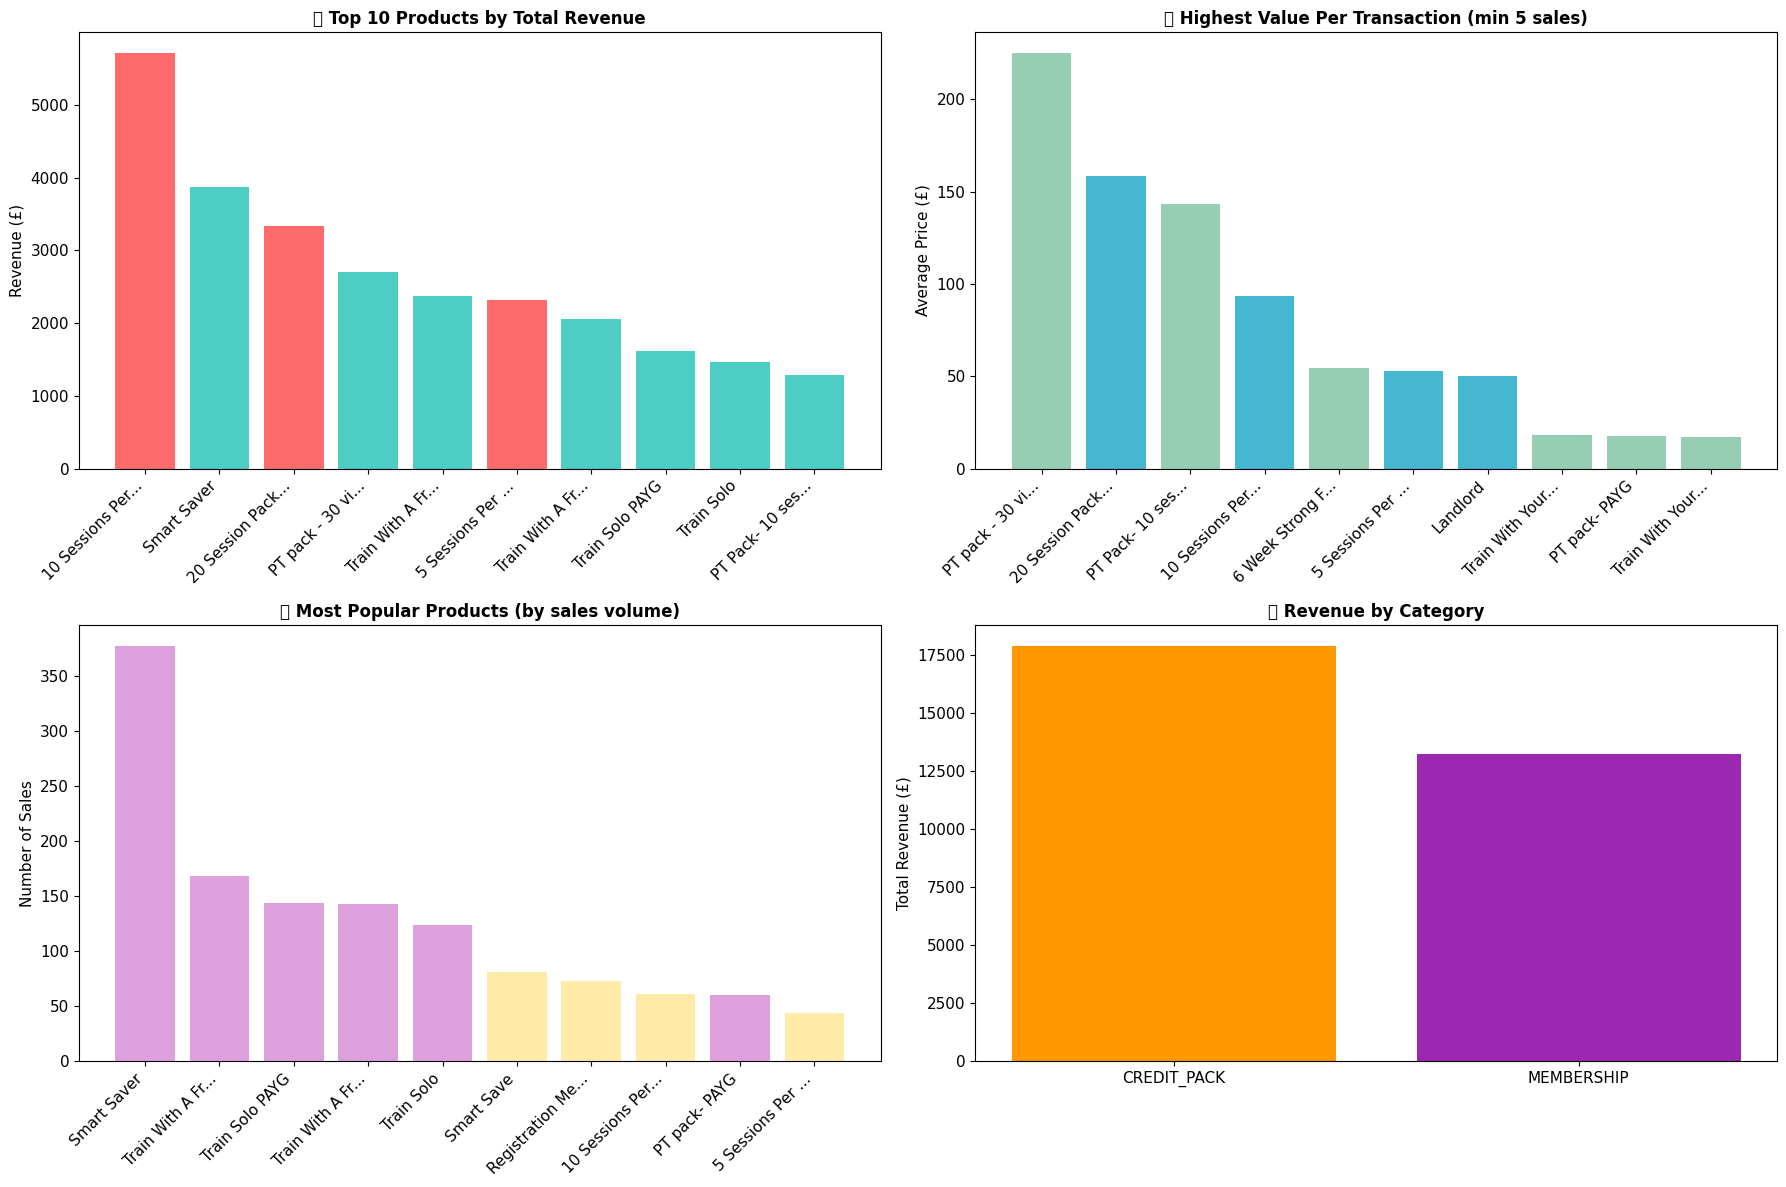


🎯 PRODUCT PERFORMANCE INSIGHTS:
   • Highest revenue product: 10 Sessions Per Month. (£5,710.00)
   • Highest value product: PT pack - 30 visits (£225.00 avg)
   • Most popular product: Smart Saver (377 sales)

💡 STRATEGIC RECOMMENDATIONS:
   📈 REVENUE OPTIMIZATION:
      • Focus promotion on '10 Sessions Per Month.' - proven revenue driver
      • Upsell customers to 'PT pack - 30 visits' - highest transaction value
      • Bundle 'Smart Saver' with higher-value services
   🎯 MEMBERSHIP STRATEGY:
      • Promote '10 Sessions Per Month.' - top membership product
      • Average membership value: £88.11
   💰 CREDIT PACK OPTIMIZATION:
      • Convert 'Smart Saver' users to memberships
      • Create membership upgrade path for high-frequency credit users


In [4]:
# =============================================================
# SECTION 3: PRODUCT PERFORMANCE & OPTIMIZATION ANALYSIS
# =============================================================
print("\n🏆 SECTION 3: PRODUCT PERFORMANCE & OPTIMIZATION ANALYSIS")
print("-" * 60)

# Comprehensive product analysis
print("🔍 COMPREHENSIVE PRODUCT PERFORMANCE ANALYSIS:")

# Create detailed product performance DataFrame
product_performance = gym_data.groupby('Item').agg({
    'Amount Inc Tax': ['sum', 'count', 'mean'],
    'Quantity Sold': 'sum',
    'Category': 'first'
}).round(2)

product_performance.columns = ['Total_Revenue', 'Sales_Count', 'Avg_Price', 'Total_Quantity', 'Category']
product_performance['Revenue_Per_Sale'] = product_performance['Total_Revenue'] / product_performance['Sales_Count']
product_performance = product_performance.sort_values('Total_Revenue', ascending=False)

# Top 10 revenue generators
print(f"\n💰 TOP 10 REVENUE GENERATORS:")
for i, (item, data) in enumerate(product_performance.head(10).iterrows(), 1):
    roi_rating = "🔥" if data['Avg_Price'] > 50 else "💰" if data['Avg_Price'] > 20 else "📊"
    print(f"   {i:2d}. {roi_rating} {item}")
    print(f"       Revenue: £{data['Total_Revenue']:,.2f} | Sales: {data['Sales_Count']} | Avg: £{data['Avg_Price']:.2f} | Category: {data['Category']}")

# Create product performance visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Chart 1: Top 10 by revenue
top_10_revenue = product_performance.head(10)
bars1 = ax1.bar(range(len(top_10_revenue)), top_10_revenue['Total_Revenue'],
                color=['#FF6B6B' if cat == 'MEMBERSHIP' else '#4ECDC4' for cat in top_10_revenue['Category']])
ax1.set_title('💰 Top 10 Products by Total Revenue', fontsize=12, fontweight='bold')
ax1.set_ylabel('Revenue (£)')
ax1.set_xticks(range(len(top_10_revenue)))
ax1.set_xticklabels([item[:15] + '...' if len(item) > 15 else item for item in top_10_revenue.index],
                    rotation=45, ha='right')

# Chart 2: Highest value per transaction
high_value_products = product_performance[product_performance['Sales_Count'] >= 5].nlargest(10, 'Avg_Price')
bars2 = ax2.bar(range(len(high_value_products)), high_value_products['Avg_Price'],
                color=['#45B7D1' if cat == 'MEMBERSHIP' else '#96CEB4' for cat in high_value_products['Category']])
ax2.set_title('💎 Highest Value Per Transaction (min 5 sales)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Price (£)')
ax2.set_xticks(range(len(high_value_products)))
ax2.set_xticklabels([item[:15] + '...' if len(item) > 15 else item for item in high_value_products.index],
                    rotation=45, ha='right')

# Chart 3: Most popular products (by sales count)
popular_products = product_performance.nlargest(10, 'Sales_Count')
bars3 = ax3.bar(range(len(popular_products)), popular_products['Sales_Count'],
                color=['#FFEAA7' if cat == 'MEMBERSHIP' else '#DDA0DD' for cat in popular_products['Category']])
ax3.set_title('📊 Most Popular Products (by sales volume)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Number of Sales')
ax3.set_xticks(range(len(popular_products)))
ax3.set_xticklabels([item[:15] + '...' if len(item) > 15 else item for item in popular_products.index],
                    rotation=45, ha='right')

# Chart 4: Category performance summary
category_summary = gym_data.groupby('Category').agg({
    'Amount Inc Tax': ['sum', 'mean'],
    'Item': 'nunique'
}).round(2)
category_summary.columns = ['Total_Revenue', 'Avg_Transaction', 'Product_Count']

bars4 = ax4.bar(category_summary.index, category_summary['Total_Revenue'],
                color=['#FF9800', '#9C27B0'])
ax4.set_title('📈 Revenue by Category', fontsize=12, fontweight='bold')
ax4.set_ylabel('Total Revenue (£)')

plt.tight_layout()
plt.show()

# Product insights and recommendations
total_revenue = gym_data['Amount Inc Tax'].sum()
membership_products = product_performance[product_performance['Category'] == 'MEMBERSHIP']
credit_products = product_performance[product_performance['Category'] == 'CREDIT_PACK']

print(f"\n🎯 PRODUCT PERFORMANCE INSIGHTS:")
print(f"   • Highest revenue product: {product_performance.index[0]} (£{product_performance.iloc[0]['Total_Revenue']:,.2f})")
print(f"   • Highest value product: {high_value_products.index[0]} (£{high_value_products.iloc[0]['Avg_Price']:.2f} avg)")
print(f"   • Most popular product: {popular_products.index[0]} ({popular_products.iloc[0]['Sales_Count']} sales)")

print(f"\n💡 STRATEGIC RECOMMENDATIONS:")
print(f"   📈 REVENUE OPTIMIZATION:")
print(f"      • Focus promotion on '{product_performance.index[0]}' - proven revenue driver")
print(f"      • Upsell customers to '{high_value_products.index[0]}' - highest transaction value")
print(f"      • Bundle '{popular_products.index[0]}' with higher-value services")

print(f"   🎯 MEMBERSHIP STRATEGY:")
if len(membership_products) > 0:
    top_membership = membership_products.iloc[0]
    print(f"      • Promote '{membership_products.index[0]}' - top membership product")
    print(f"      • Average membership value: £{membership_products['Avg_Price'].mean():.2f}")

print(f"   💰 CREDIT PACK OPTIMIZATION:")
if len(credit_products) > 0:
    print(f"      • Convert '{credit_products.nlargest(1, 'Sales_Count').index[0]}' users to memberships")
    print(f"      • Create membership upgrade path for high-frequency credit users")


📅 SECTION 4: SEASONAL TRENDS & CUSTOMER BEHAVIOR PATTERNS
-----------------------------------------------------------------
🔍 SEASONAL BUSINESS PATTERN ANALYSIS:

📊 MONTHLY BUSINESS PERFORMANCE:
   📅 Jan 25:
      Revenue: £5,655.00 | Transactions: 272.0 | Avg: £20.79
      Memberships: 91.0 (33.5%) | Membership Revenue: £2,116.88
   📅 Feb 25:
      Revenue: £5,062.66 | Transactions: 191.0 | Avg: £26.51
      Memberships: 47.0 (24.6%) | Membership Revenue: £2,200.64
   📅 MArch 25:
      Revenue: £4,651.67 | Transactions: 207.0 | Avg: £22.47
      Memberships: 35.0 (16.9%) | Membership Revenue: £2,204.00
   📅 Apr 25:
      Revenue: £4,537.73 | Transactions: 210.0 | Avg: £21.61
      Memberships: 34.0 (16.2%) | Membership Revenue: £1,924.40
   📅 May 25:
      Revenue: £5,530.35 | Transactions: 244.0 | Avg: £22.67
      Memberships: 38.0 (15.6%) | Membership Revenue: £2,321.12
   📅 Jun 25:
      Revenue: £5,698.50 | Transactions: 248.0 | Avg: £22.98
      Memberships: 46.0 (18.5%) | Memb

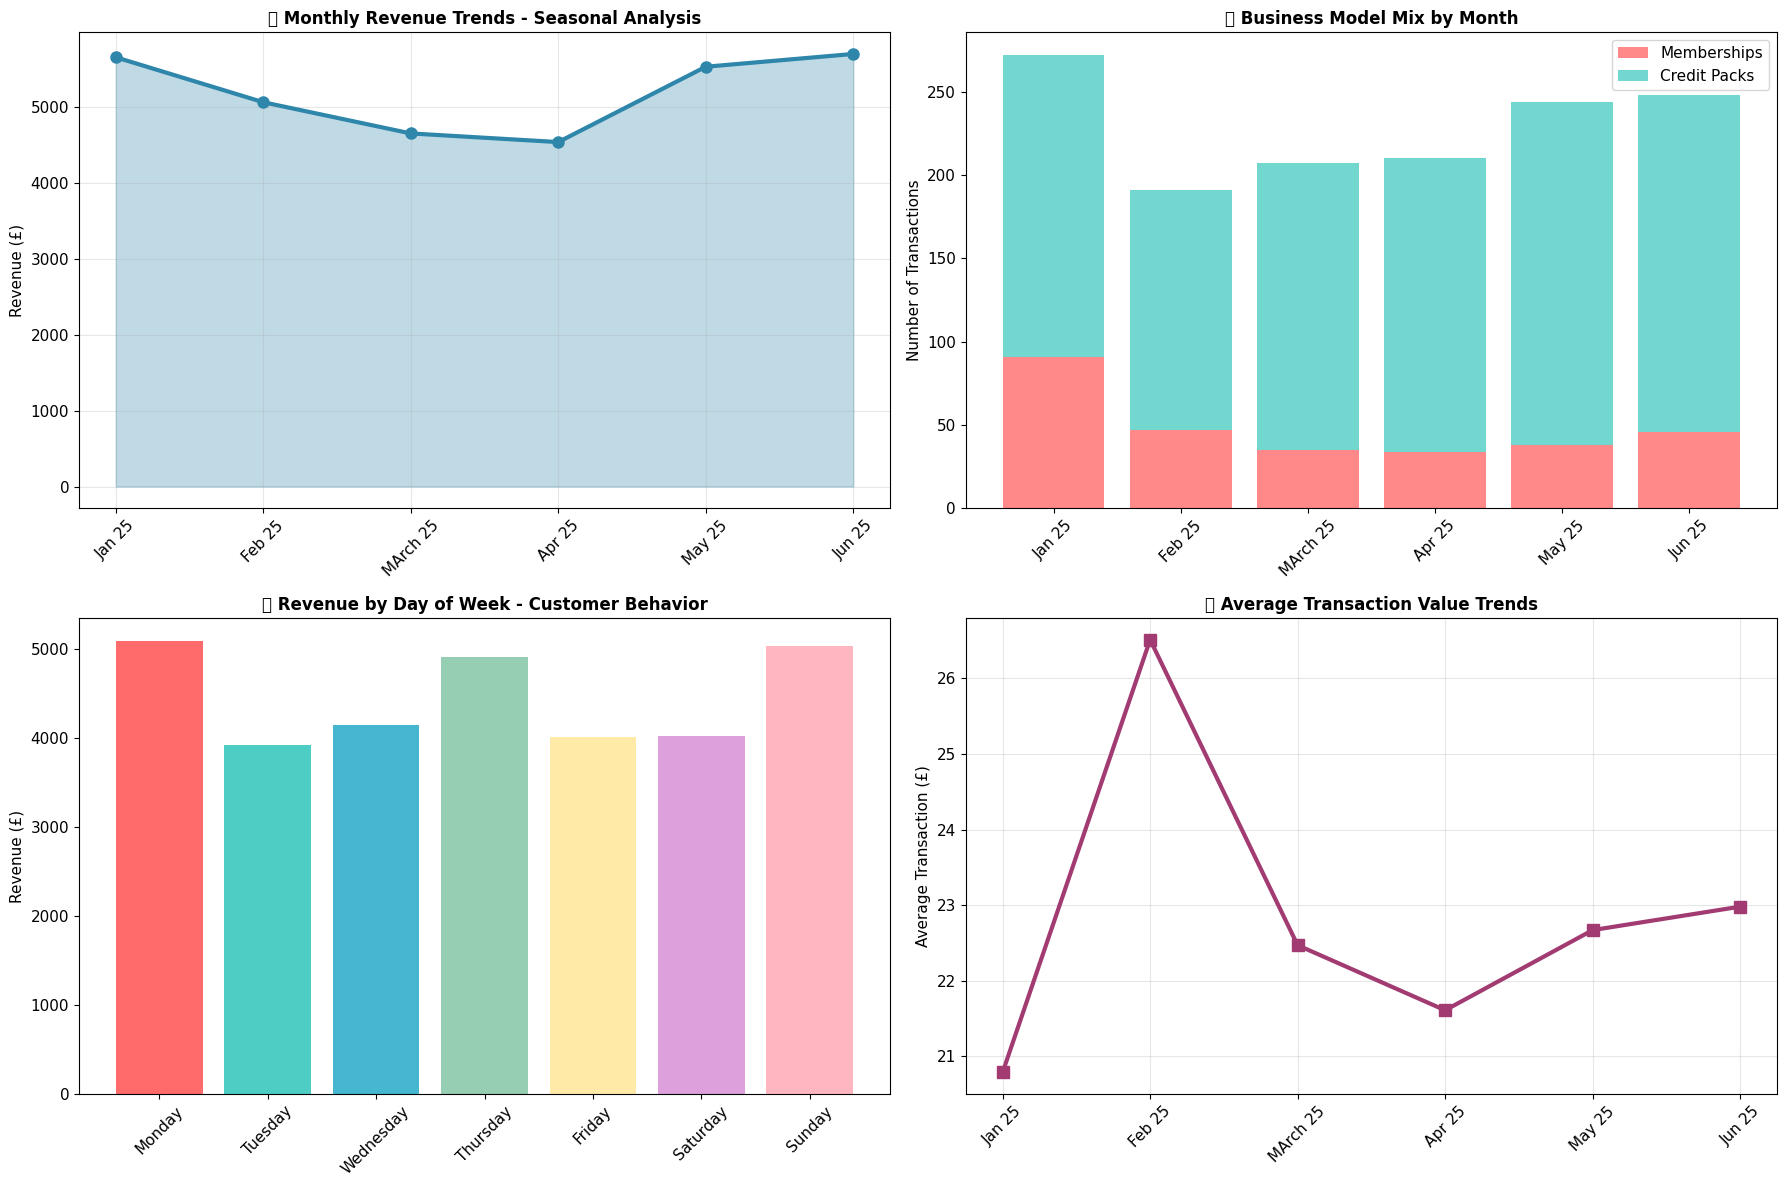


🎯 SEASONAL BUSINESS INTELLIGENCE:
   • Peak performance month: Jun 25 (£5,698.50)
   • Lowest performance month: Apr 25 (£4,537.73)
   • Seasonal revenue variance: 25.6%
   • Best day of week: Monday (£5,090.42)
   • Membership conversion rate: 20.9% average

🚀 FINAL STRATEGIC RECOMMENDATIONS:
   💰 REVENUE OPTIMIZATION:
      • Replicate Jun 25 success factors in weaker months
      • Focus marketing spend during Mondays
      • Target membership conversion - currently 20.9% of transactions
   📈 GROWTH OPPORTUNITIES:
      • Seasonal campaigns for Apr 25 improvement
      • Membership upselling during peak Monday traffic
      • Annual revenue potential: £62,272

🏆 COMPREHENSIVE BUSINESS INTELLIGENCE ANALYSIS COMPLETE
📊 Strategic insights delivered for data-driven decision making
🎯 Your gym is positioned for optimized growth and profitability


In [5]:
# =============================================================
# SECTION 4: SEASONAL TRENDS & CUSTOMER BEHAVIOR PATTERNS
# =============================================================
print("\n📅 SECTION 4: SEASONAL TRENDS & CUSTOMER BEHAVIOR PATTERNS")
print("-" * 65)

# Monthly trends and seasonal analysis
print("🔍 SEASONAL BUSINESS PATTERN ANALYSIS:")

# Monthly performance breakdown
monthly_analysis = gym_data.groupby('Source_Month').agg({
    'Amount Inc Tax': ['sum', 'count', 'mean'],
    'Category': lambda x: (x == 'MEMBERSHIP').sum(),  # Count of membership transactions
}).round(2)

monthly_analysis.columns = ['Revenue', 'Total_Transactions', 'Avg_Transaction', 'Membership_Count']
monthly_analysis['Credit_Pack_Count'] = monthly_analysis['Total_Transactions'] - monthly_analysis['Membership_Count']
monthly_analysis['Membership_Ratio'] = (monthly_analysis['Membership_Count'] / monthly_analysis['Total_Transactions'] * 100).round(1)

# Sort by month order for seasonal analysis
month_order = ['Jan 25', 'Feb 25', 'MArch 25', 'Apr 25', 'May 25', 'Jun 25']
monthly_analysis = monthly_analysis.reindex([m for m in month_order if m in monthly_analysis.index])

print(f"\n📊 MONTHLY BUSINESS PERFORMANCE:")
for month, data in monthly_analysis.iterrows():
    membership_revenue = gym_data[(gym_data['Source_Month'] == month) & (gym_data['Category'] == 'MEMBERSHIP')]['Amount Inc Tax'].sum()
    print(f"   📅 {month}:")
    print(f"      Revenue: £{data['Revenue']:,.2f} | Transactions: {data['Total_Transactions']} | Avg: £{data['Avg_Transaction']:.2f}")
    print(f"      Memberships: {data['Membership_Count']} ({data['Membership_Ratio']:.1f}%) | Membership Revenue: £{membership_revenue:,.2f}")

# Day of week analysis for customer behavior
print(f"\n📆 CUSTOMER BEHAVIOR BY DAY OF WEEK:")
weekday_analysis = gym_data.groupby('Weekday').agg({
    'Amount Inc Tax': ['sum', 'count', 'mean'],
    'Category': lambda x: (x == 'MEMBERSHIP').sum()
}).round(2)

weekday_analysis.columns = ['Revenue', 'Transactions', 'Avg_Transaction', 'Membership_Count']
weekday_analysis['Membership_Ratio'] = (weekday_analysis['Membership_Count'] / weekday_analysis['Transactions'] * 100).round(1)

# Reorder days properly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_analysis = weekday_analysis.reindex([day for day in day_order if day in weekday_analysis.index])

for day, data in weekday_analysis.iterrows():
    print(f"   {day}: £{data['Revenue']:,.2f} ({data['Transactions']} transactions, {data['Membership_Ratio']:.1f}% memberships)")

# Create comprehensive seasonal visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Chart 1: Monthly revenue trends
ax1.plot(monthly_analysis.index, monthly_analysis['Revenue'], marker='o', linewidth=3, markersize=8, color='#2E86AB')
ax1.fill_between(monthly_analysis.index, monthly_analysis['Revenue'], alpha=0.3, color='#2E86AB')
ax1.set_title('📈 Monthly Revenue Trends - Seasonal Analysis', fontsize=12, fontweight='bold')
ax1.set_ylabel('Revenue (£)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Chart 2: Membership vs Credit Pack ratio over time
ax2.bar(monthly_analysis.index, monthly_analysis['Membership_Count'], label='Memberships', color='#FF6B6B', alpha=0.8)
ax2.bar(monthly_analysis.index, monthly_analysis['Credit_Pack_Count'], bottom=monthly_analysis['Membership_Count'],
        label='Credit Packs', color='#4ECDC4', alpha=0.8)
ax2.set_title('🏷️ Business Model Mix by Month', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Transactions')
ax2.legend()
ax2.tick_params(axis='x', rotation=45)

# Chart 3: Day of week performance
bars3 = ax3.bar(weekday_analysis.index, weekday_analysis['Revenue'],
                color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#FFB6C1'])
ax3.set_title('📅 Revenue by Day of Week - Customer Behavior', fontsize=12, fontweight='bold')
ax3.set_ylabel('Revenue (£)')
ax3.tick_params(axis='x', rotation=45)

# Chart 4: Average transaction value trends
ax4.plot(monthly_analysis.index, monthly_analysis['Avg_Transaction'], marker='s', linewidth=3, markersize=8, color='#A23B72')
ax4.set_title('💳 Average Transaction Value Trends', fontsize=12, fontweight='bold')
ax4.set_ylabel('Average Transaction (£)')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Business intelligence insights
best_month = monthly_analysis['Revenue'].idxmax()
worst_month = monthly_analysis['Revenue'].idxmin()
best_day = weekday_analysis['Revenue'].idxmax()
seasonal_variance = ((monthly_analysis['Revenue'].max() - monthly_analysis['Revenue'].min()) / monthly_analysis['Revenue'].min() * 100)

print(f"\n🎯 SEASONAL BUSINESS INTELLIGENCE:")
print(f"   • Peak performance month: {best_month} (£{monthly_analysis.loc[best_month, 'Revenue']:,.2f})")
print(f"   • Lowest performance month: {worst_month} (£{monthly_analysis.loc[worst_month, 'Revenue']:,.2f})")
print(f"   • Seasonal revenue variance: {seasonal_variance:.1f}%")
print(f"   • Best day of week: {best_day} (£{weekday_analysis.loc[best_day, 'Revenue']:,.2f})")
print(f"   • Membership conversion rate: {monthly_analysis['Membership_Ratio'].mean():.1f}% average")

print(f"\n🚀 FINAL STRATEGIC RECOMMENDATIONS:")
print(f"   💰 REVENUE OPTIMIZATION:")
print(f"      • Replicate {best_month} success factors in weaker months")
print(f"      • Focus marketing spend during {best_day}s")
print(f"      • Target membership conversion - currently {monthly_analysis['Membership_Ratio'].mean():.1f}% of transactions")
print(f"   📈 GROWTH OPPORTUNITIES:")
print(f"      • Seasonal campaigns for {worst_month} improvement")
print(f"      • Membership upselling during peak {best_day} traffic")
print(f"      • Annual revenue potential: £{monthly_analysis['Revenue'].sum() * 2:,.0f}")

print(f"\n" + "="*65)
print(f"🏆 COMPREHENSIVE BUSINESS INTELLIGENCE ANALYSIS COMPLETE")
print(f"📊 Strategic insights delivered for data-driven decision making")
print(f"🎯 Your gym is positioned for optimized growth and profitability")
print(f"="*65)